**Shubham Gopal Raul**  
*CB.EN.P2AEL23023*<br>

## <center>21BM681 Machine Learning and Embedded Programming Lab 10</center>

### <center>Decision Making – Multi-layer Perceptron</center>

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [24]:
def MLPModel(X_train, X_test, Y_train, Y_test,layer):
    perceptron = MLPClassifier(hidden_layer_sizes=layer,max_iter=1000)
    perceptron.fit(X_train,Y_train)
    Y_pred = perceptron.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt='g')
    return Y_pred
def report(model,Y_test,Y_pred):
    cls = {
        'Accuracy' : round(accuracy_score(Y_test,Y_pred),2),
    'Precision Wgt' : round(precision_score(Y_test,Y_pred,average='weighted'),2),
    'F1 Score Wgt': round(f1_score(Y_test,Y_pred,average='weighted'),2),
     'Recall Wgt': round(recall_score(Y_test,Y_pred,average='weighted'),2)
    }
    return pd.DataFrame(cls.values(),index=cls.keys(),columns=[model])

def listToString(s):
 
    # initialize an empty string
    str1 = ""
 
    # traverse in the string
    for ele in s:
        str1 += str(ele)+", "
 
    # return string
    return str1

### Iris Dataset

In [38]:
iris_data = pd.read_csv('../Data/iris.csv',names=['Sepal_length','Sepal_width','Petal_length','Petal_width','Species'])
Encoder = LabelEncoder()
iris_data['Species'] = Encoder.fit_transform(iris_data['Species'])
iris_data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
 x_train, x_test, y_train, y_test = train_test_split(iris_data.drop('Species',axis=1),iris_data.Species,test_size=0.2,random_state=100)

In [44]:
df = pd.DataFrame()

for hidden layer  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

for hidden layer  2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      1.00      0.92         6
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

for hidden layer  3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         6
           2   

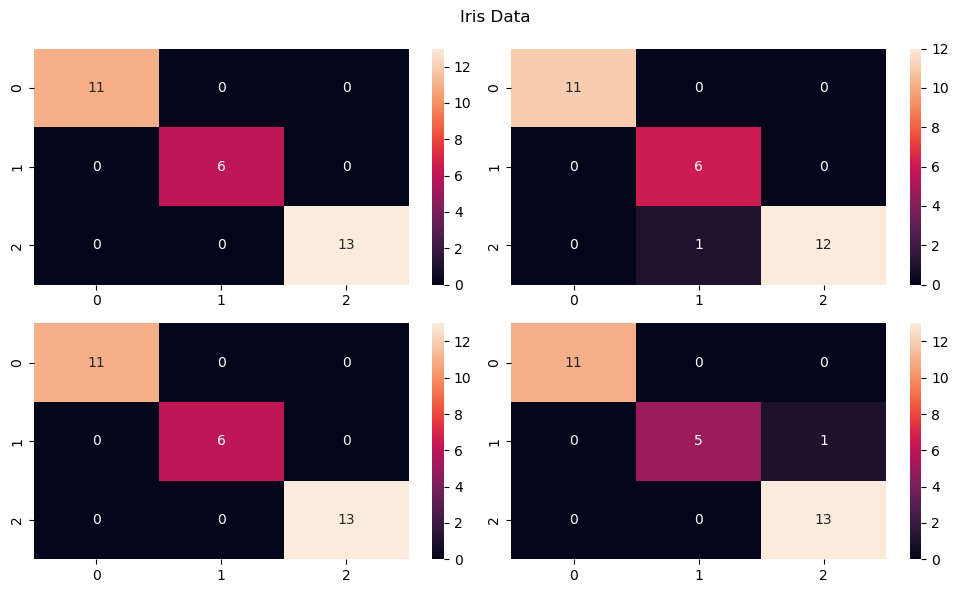

In [45]:
Layer=[10,[10,5],[10,5,5],[10,10,5,3]]
fig = plt.figure(figsize=(10,6))
for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    print("for hidden layer ",i+1)
    y_pred = MLPModel(x_train, x_test, y_train, y_test,Layer[i])
    plt.tight_layout()
    if(i==0):
        rep = report(str(Layer[i]),y_test,y_pred)
    else:
        rep = report(listToString(Layer[i]),y_test,y_pred)
    df=pd.concat([df,rep],axis=1)
fig.suptitle("Iris Data")
plt.tight_layout()

In [46]:
df.transpose()

,Accuracy,Precision Wgt,F1 Score Wgt,Recall Wgt
10,1.00,1.00,1.00,1.00
"10, 5,",0.97,0.97,0.97,0.97
"10, 5, 5,",1.00,1.00,1.00,1.00
"10, 10, 5, 3,",0.97,0.97,0.97,0.97


### Car Evaluation Dataset

In [47]:
car_data = car_data = pd.read_csv('../Data/car_evaluation.csv',names=['Buying_price','Maintainance_Price','No_of_doors','Person_Capacity','Size_of_luggage','Safety','Acceptability'])
Encoder = LabelEncoder()
for i in car_data.columns:
    car_data[i] = Encoder.fit_transform(car_data[i])
car_data.head()

,Buying_price,Maintainance_Price,No_of_doors,Person_Capacity,Size_of_luggage,Safety,Acceptability
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [48]:
 x_train, x_test, y_train, y_test = train_test_split(car_data.drop('Acceptability',axis=1),car_data.Acceptability,test_size=0.2,random_state=100)


In [49]:
df = pd.DataFrame()

for hidden layer  1
              precision    recall  f1-score   support

           0       0.66      0.93      0.77        72
           1       1.00      0.18      0.30        17
           2       0.98      0.94      0.96       248
           3       1.00      0.44      0.62         9

    accuracy                           0.89       346
   macro avg       0.91      0.62      0.66       346
weighted avg       0.91      0.89      0.88       346

for hidden layer  2
              precision    recall  f1-score   support

           0       0.84      0.92      0.87        72
           1       1.00      0.82      0.90        17
           2       0.98      0.97      0.98       248
           3       0.86      0.67      0.75         9

    accuracy                           0.95       346
   macro avg       0.92      0.84      0.88       346
weighted avg       0.95      0.95      0.95       346

for hidden layer  3
              precision    recall  f1-score   support

           0   

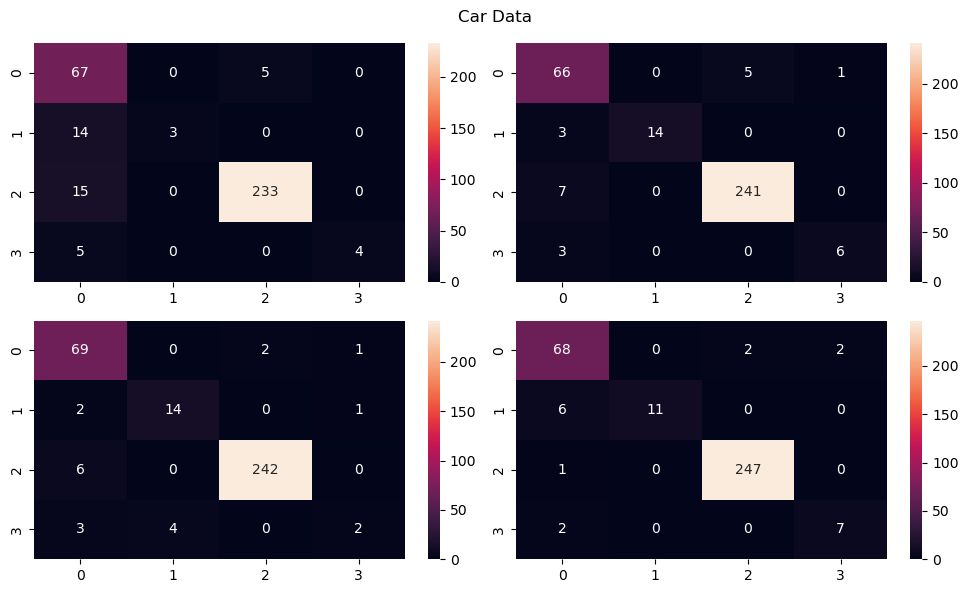

In [50]:
Layer=[10,[10,10],[10,10,5],[15,10,10,5]]
fig = plt.figure(figsize=(10,6))
for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    print("for hidden layer ",i+1)
    y_pred = MLPModel(x_train, x_test, y_train, y_test,Layer[i])
    plt.tight_layout()
    if(i==0):
        rep = report(str(Layer[i]),y_test,y_pred)
    else:
        rep = report(listToString(Layer[i]),y_test,y_pred)
    df=pd.concat([df,rep],axis=1)
fig.suptitle("Car Data")
plt.tight_layout()

In [51]:
df.transpose()

,Accuracy,Precision Wgt,F1 Score Wgt,Recall Wgt
10,0.89,0.91,0.88,0.89
"10, 10,",0.95,0.95,0.95,0.95
"10, 10, 5,",0.95,0.94,0.94,0.95
"15, 10, 10, 5,",0.96,0.96,0.96,0.96
